#**Problem Statement: Driver Attrition Prediction at Ola**

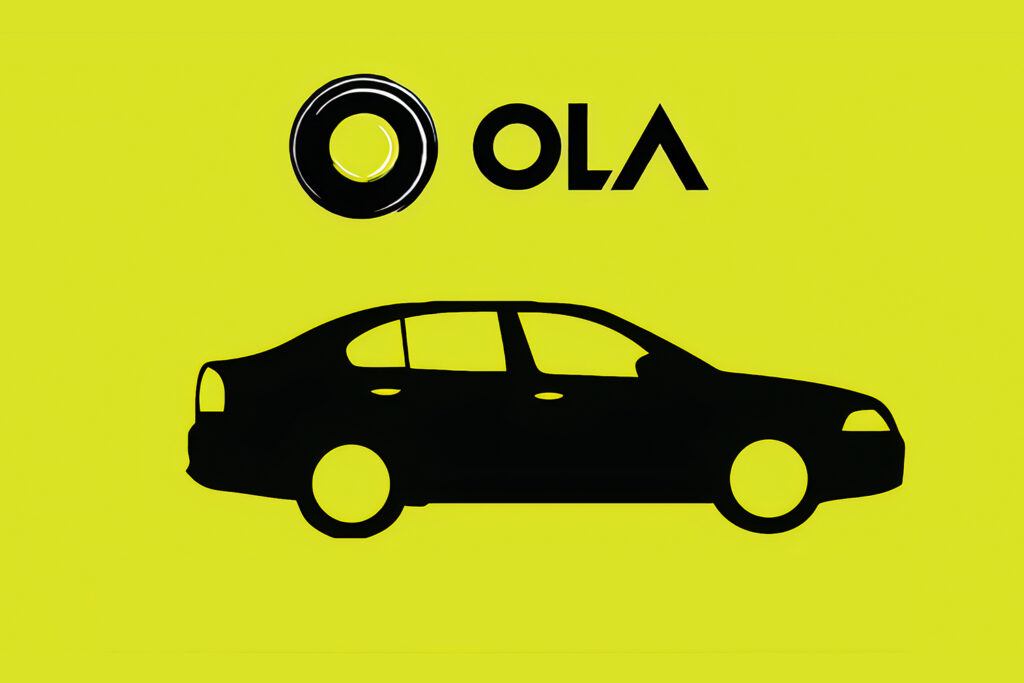

##**Context:**
Driver retention is a critical challenge for ride-hailing platforms like Ola. High churn rates among drivers lead to increased recruitment costs, loss of trained manpower, and disruptions in service quality. Drivers can easily switch platforms based on fluctuating incentives, making it imperative for Ola to proactively identify at-risk drivers and take preventive action.


##**Business Problem:**
Ola’s Driver Operations and Analytics teams need to accurately predict which drivers are likely to leave the platform, enabling targeted interventions to improve retention. Currently, driver attrition not only increases operational costs due to frequent acquisition efforts but also negatively impacts organizational morale and customer satisfaction.


##**Objective:**
To build a predictive model that can classify whether a driver is likely to leave or stay with Ola in a given month, using historical and demographic data.


##**Scope of Data:**
The dataset includes monthly information for a segment of drivers across 2019 and 2020. Key features include:

**Demographics**: City, age, gender, etc.

**Tenure Details**: Joining date, last working date, total tenure

**Performance Metrics**: Quarterly ratings, monthly income, business acquired, driver grade


##**Deliverables:**

A binary classification model that predicts driver attrition (Leave = 1, Stay = 0)

Feature importance analysis to identify key drivers of attrition

Actionable insights for the Driver Retention Team

A dashboard or reporting mechanism (optional) for real-time monitoring


##**Success Metric:**
The model will be evaluated using accuracy, precision, recall, F1-score, and ROC-AUC, with particular emphasis on minimizing false negatives (i.e., drivers likely to leave but not flagged).

In [528]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!gdown 1G-H1cFM_ib7A50lWutA-2jU-SO8ANdWo

Downloading...
From: https://drive.google.com/uc?id=1G-H1cFM_ib7A50lWutA-2jU-SO8ANdWo
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 104MB/s]


In [529]:
df = pd.read_csv('/content/ola_driver_scaler.csv', index_col= 0)

#Data Exploring

In [530]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [531]:
df[df['Driver_ID'] ==1 ]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2


In [532]:
print(f'No of rows  {df.shape[0]}')
print(f'No of columns  {df.shape[1]}')

No of rows  19104
No of columns  13


In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 2.5+ MB


In [534]:
col = ['MMM-YY' , 'Dateofjoining', 'LastWorkingDate']
for i in col:
  df[i] = pd.to_datetime(df[i])

In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns](3),

In [536]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
MMM-YY,19104,2019-12-11 02:09:29.849246464,2019-01-01 00:00:00,2019-06-01 00:00:00,2019-12-01 00:00:00,2020-07-01 00:00:00,2020-12-01 00:00:00,NaN
Driver_ID,19104.0,1415.591133,1.0,710.0,1417.0,2137.0,2788.0,810.705321
Age,19043.0,34.668435,21.0,30.0,34.0,39.0,58.0,6.257912
Gender,19052.0,0.418749,0.0,0.0,0.0,1.0,1.0,0.493367
Education_Level,19104.0,1.021671,0.0,0.0,1.0,2.0,2.0,0.800167
Income,19104.0,65652.025126,10747.0,42383.0,60087.0,83969.0,188418.0,30914.515344
Dateofjoining,19104,2018-04-28 20:52:54.874371840,2013-04-01 00:00:00,2016-11-29 12:00:00,2018-09-12 00:00:00,2019-11-05 00:00:00,2020-12-28 00:00:00,NaN
LastWorkingDate,1616,2019-12-21 20:59:06.534653696,2018-12-31 00:00:00,2019-06-06 00:00:00,2019-12-20 12:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00,NaN
Joining Designation,19104.0,1.690536,1.0,1.0,1.0,2.0,5.0,0.836984
Grade,19104.0,2.25267,1.0,1.0,2.0,3.0,5.0,1.026512


**Observations:**
- The Income column has a standard deviation of **30,914.52**, indicating high variability in drivers' earnings.

- The Total Business Value column has an even larger standard deviation of **1,128,312.22**, further emphasizing **wide variability** in the business generated by drivers.

- The 25th percentile of the Total Business Value is approximately **0**, which means that **25% of the time**, drivers generated **no business** — this is a potential red flag, possibly indicating inactive or underperforming drivers.

In [537]:
df.describe(include = object)

,City
count,19104
unique,29
top,C20
freq,1008


In [538]:
df_original = df.copy(deep = True )

In [539]:
(df.isna().sum() /len(df)) * 100

,0
MMM-YY,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039
Joining Designation,0.000000


In [540]:
orginal_df = df.copy(deep = True)

**Observations:**
- There are inconsistencies in data types across multiple columns.

- There are missing (null) values in the Age, Gender, and Last Working Date columns.

#Handling Missing Values

In [541]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 3)
df['Age'] = imputer.fit_transform(df[['Age']])
df['Gender'] = imputer.fit_transform(df[['Gender']])

In [542]:
print(orginal_df['Age'].value_counts().iloc[:3])
print(df['Age'].value_counts().iloc[:3])

Age
36.0    1283
33.0    1250
34.0    1234
Name: count, dtype: int64
Age
36.0    1283
33.0    1250
34.0    1234
Name: count, dtype: int64


In [543]:
print(orginal_df['Gender'].value_counts().iloc[:3])
print(df['Gender'].value_counts().iloc[:3])

Gender
0.0    11074
1.0     7978
Name: count, dtype: int64
Gender
0.000000    11074
1.000000     7978
0.418749       52
Name: count, dtype: int64


In [544]:
df['Gender'] = df['Gender'].astype(int)

**Explanation**
- Missing values in the `Age` and **Gender** columns were successfully handled using a **KNN imputer**, ensuring the dataset remains complete without introducing bias from simple mean/median imputation.

#Feature Engineering

In [545]:
df = df.sort_values(by =['Driver_ID'  , 'MMM-YY'])

In [546]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [547]:
data = df.groupby('Driver_ID').agg(
    QR_first = ('Quarterly Rating' , 'first'),
    QR_last = ('Quarterly Rating' , 'last') ,
    Income_first =('Income' , 'first') ,
    Income_last = ('Income' ,'last')).reset_index()
data

,Driver_ID,QR_first,QR_last,Income_first,Income_last
0,1,2,2,57387,57387
1,2,1,1,67016,67016
2,4,1,1,65603,65603
3,5,1,1,46368,46368
4,6,1,2,78728,78728
...,...,...,...,...,...
2376,2784,3,4,82815,82815
2377,2785,1,1,12105,12105
2378,2786,2,1,35370,35370
2379,2787,2,1,69498,69498


In [548]:
data['Income_raise'] = (data['Income_last'] > data['Income_first']).astype(int)
data['Rating_raise'] = (data['QR_last'] > data['QR_first']).astype(int)

In [549]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [550]:
func = {
    'MMM-YY' : 'last',
    'Driver_ID' : 'first',
    'Age' : 'last',
    'Gender' : 'last' ,
    'City' : 'last' ,
    'Education_Level' : 'last',
    'Income' : 'last' ,
    'Dateofjoining' : 'first' ,
    'LastWorkingDate' : 'last' ,
    'Joining Designation' : 'first' ,
    'Grade' : 'last',
    'Total Business Value' : 'sum' ,
    'Quarterly Rating' : 'last'
}
df  = df.groupby('Driver_ID').agg(func)


In [551]:
print(f'Shape of data before transformation {orginal_df.shape}')
print(f'Shape of data after transformation {df.shape}')

Shape of data before transformation (19104, 13)
Shape of data after transformation (2381, 13)


In [552]:
df['Churn'] = np.where(df['LastWorkingDate'].notna() , 1 ,0)
df =df.reset_index(drop = True)

In [553]:
df = df.merge(data[['Driver_ID' , 'Income_raise' , 'Rating_raise']] , on = 'Driver_ID' , how = 'inner')

In [554]:
df['Age'] = df['Age'].astype(int)

In [555]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
MMM-YY,2381,2020-03-31 15:04:09.475010560,2019-01-01 00:00:00,2019-09-01 00:00:00,2020-06-01 00:00:00,2020-12-01 00:00:00,2020-12-01 00:00:00,NaN
Driver_ID,2381.0,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
Age,2381.0,33.684586,21.0,29.0,33.0,37.0,58.0,5.968409
Gender,2381.0,0.408652,0.0,0.0,0.0,1.0,1.0,0.491688
Education_Level,2381.0,1.00756,0.0,0.0,1.0,2.0,2.0,0.81629
Income,2381.0,59334.157077,10747.0,39104.0,55315.0,75986.0,188418.0,28383.666384
Dateofjoining,2381,2019-02-08 07:14:50.550189056,2013-04-01 00:00:00,2018-06-29 00:00:00,2019-07-21 00:00:00,2020-05-02 00:00:00,2020-12-28 00:00:00,NaN
LastWorkingDate,1616,2019-12-21 20:59:06.534653440,2018-12-31 00:00:00,2019-06-06 00:00:00,2019-12-20 12:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00,NaN
Joining Designation,2381.0,1.820244,1.0,1.0,2.0,2.0,5.0,0.841433
Grade,2381.0,2.096598,1.0,1.0,2.0,3.0,5.0,0.941522


In [556]:
df.drop(['LastWorkingDate'] , axis =1  , inplace = True)

In [557]:
df.groupby('Churn')['Total Business Value'].describe().T

Churn,0,1
count,7.650000e+02,1.616000e+03
mean,9.620626e+06,2.203746e+06
std,1.323157e+07,4.717754e+06
min,0.000000e+00,-1.385530e+06
25%,2.409200e+05,0.000000e+00
50%,2.636210e+06,4.650250e+05
75%,1.629080e+07,2.345702e+06
max,9.533106e+07,6.015383e+07


In [558]:
def Age_group(age):
  if age <= 30:
    return 'Young'
  elif age > 30 and age <=50:
    return 'Middle - aged'
  else:
    return 'senior'
df['Age_group'] = df['Age'].apply(Age_group)

In [559]:
df['Positive_Business'] = np.where(df['Total Business Value'] > 0 , 1, 0)

In [560]:
df['YearofJoining'] = df['Dateofjoining'].dt.year
df['MonthofJoining'] = df['Dateofjoining'].dt.month

In [561]:
df.drop(['MMM-YY' , 'Driver_ID', 'Dateofjoining' ], axis = 1 , inplace = True)

In [562]:
df.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn,Income_raise,Rating_raise,Age_group,Positive_Business,YearofJoining,MonthofJoining
0,28,0,C23,2,57387,1,1,1715580,2,1,0,0,Young,1,2018,12
1,31,0,C7,2,67016,2,2,0,1,0,0,0,Middle - aged,0,2020,11
2,43,0,C13,2,65603,2,2,350000,1,1,0,0,Middle - aged,1,2019,12
3,29,0,C9,0,46368,1,1,120360,1,1,0,0,Young,1,2019,1
4,31,1,C11,1,78728,3,3,1265000,2,0,0,1,Middle - aged,1,2020,7


**Data Preparation Steps**:

**Record Consolidation**

- Aggregated multiple records per driver into a single row to create a driver-level dataset.

***Feature Engineering***

- Created flag columns such as Quarterly_Raise and Income_Raise to indicate whether a driver received a quarterly rating increase or an income raise.

**Target Variable Creation**

- Built a Churn column using the Last_Working_Day field:

    - *`1 = Driver left the organization (date present).`*

    - `*0 = Driver still active (date missing).*`

#Univariate Analysis


In [563]:
num_data = df.select_dtypes(include = ['int' , 'float'])
num_data.shape


(2381, 14)

Text(0.5, 1.0, 'Drivers Churn status')

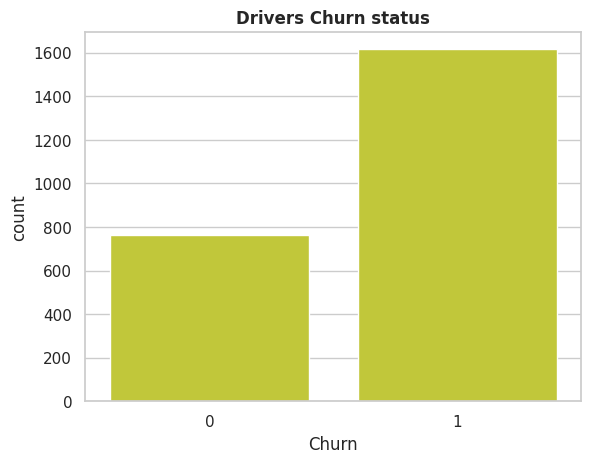

In [564]:
sns.countplot(data = df , x= 'Churn',color = '#D6DF22')
plt.title('Drivers Churn status',fontweight = 'bold')

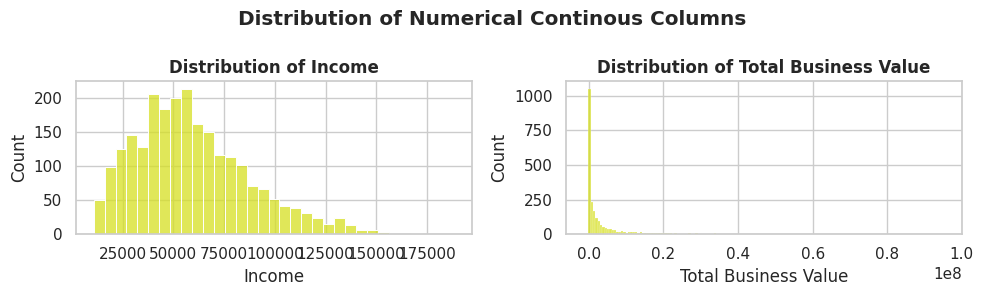

In [565]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
axes = axes.flatten()

cols = ['Income' ,'Total Business Value']
for i, col in enumerate(cols):
  sns.histplot(df[col] , ax = axes[i] , color = '#D6DF22')
  axes[i].set_title(f'Distribution of {col}' , fontweight = 'bold')
plt.suptitle('Distribution of Numerical Continous Columns' , fontweight = 'bold')
plt.tight_layout()
plt.show()

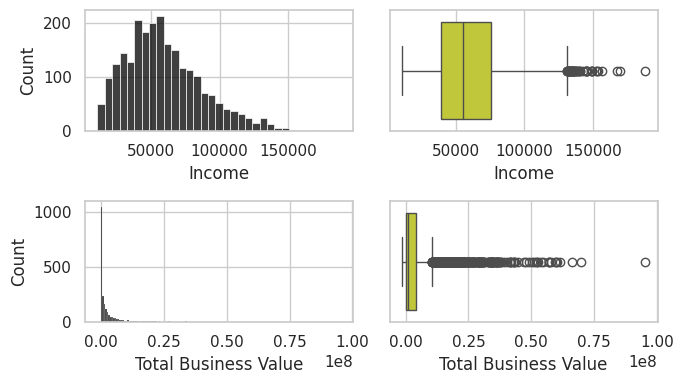

In [566]:
plt.figure(figsize = (7,4))
plt.subplot(2,2,1)
sns.histplot(data = df , x= 'Income' , color = '#000000' )

plt.subplot(2,2,2)
sns.boxplot(data = df , x = 'Income', color = "#D6DF22")

plt.subplot(2,2,3)
sns.histplot(data = df , x= 'Total Business Value' , color = '#000000' )

plt.subplot(2,2,4)
sns.boxplot(data = df , x = 'Total Business Value' , color = "#D6DF22")

plt.tight_layout()

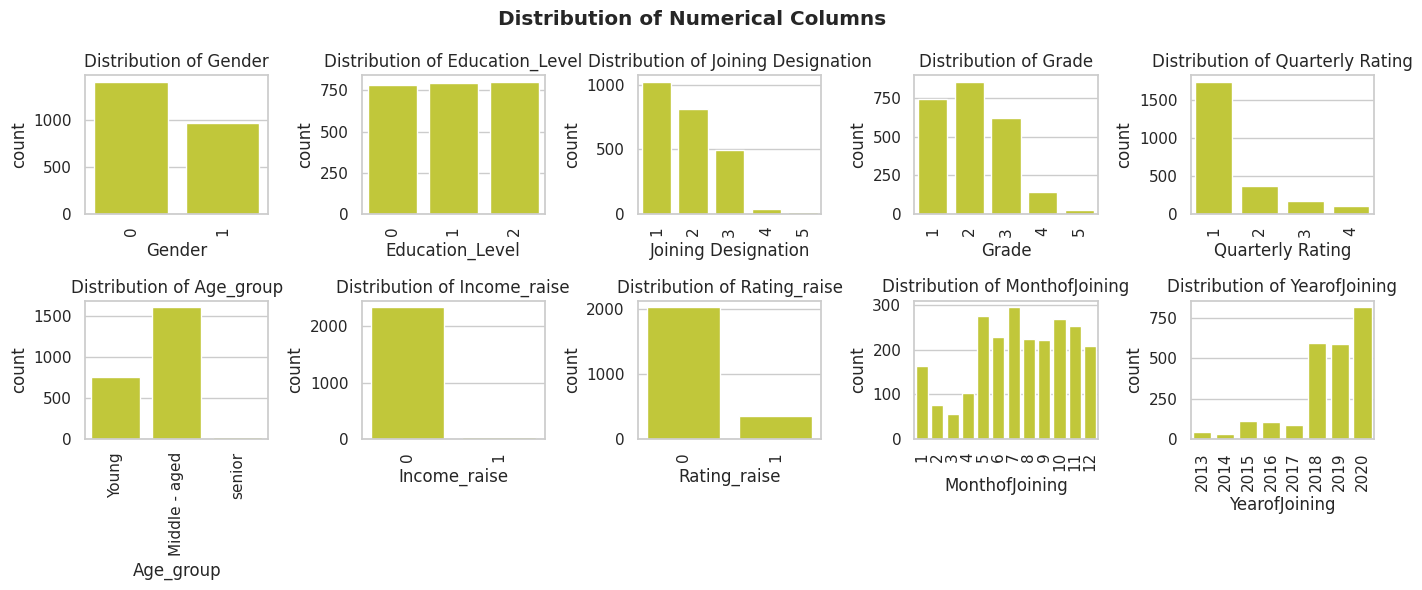

In [567]:
cols = ['Gender' , 'Education_Level'  , 'Joining Designation' ,'Grade' , 'Quarterly Rating' , 'Age_group'  , 'Income_raise' ,'Rating_raise' , 'MonthofJoining' , 'YearofJoining']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
  sns.countplot(x= col , data = df , ax = axes[i] , color = '#D6DF22'  )
  axes[i].set_title(f'Distribution of {col}' )
  axes[i].tick_params(axis='x', rotation=90)
plt.suptitle('Distribution of Numerical Columns' , fontweight = 'bold')
plt.tight_layout()
plt.show()

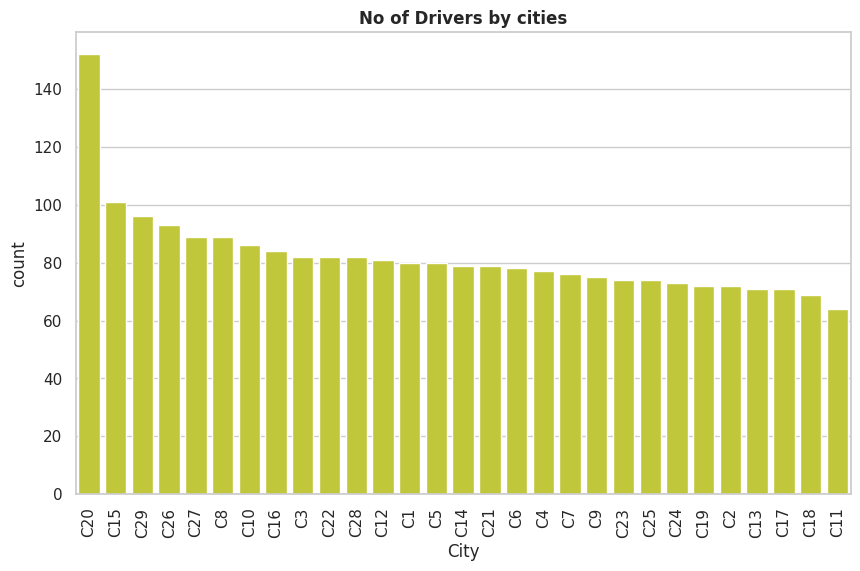

In [568]:

plt.figure(figsize = (10,6))
sns.set_theme(style= 'whitegrid')
sns.countplot(x = df['City'], color = '#D6DF22' , order = df['City'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('No of Drivers by cities' , fontweight = 'bold')
plt.show()

**Observations**
- There are 1,600 drivers who have **churned** compared to 800 drivers who have **not churned**, indicating a **churn rate of 66.7%** in the dataset showing a class imbalance.

- The **Income** column has less number of outliers and showing a narrow positive skew while **total Business value** is having heavy outliers showing anheavy skewess in the data

---

- **Gender Distribution**

  The platform has more male drivers than female drivers, indicating a significant gender imbalance.

  This could point to untapped potential in encouraging more female participation.

- **Age Group**

  The majority of drivers are middle-aged, followed by young drivers, while senior drivers are very few.

  This suggests that the platform is primarily driven by a younger workforce, with low representation from older age groups.

- **Year of Joining**

  Most drivers joined between 2018 and 2020, which indicates a rapid expansion phase in those years.

  Very few joined before 2017, showing the platform scaled aggressively in recent years.

- **Quarterly Rating**

  A large number of drivers have received low ratings, with only a small proportion achieving higher ratings.

  This is a red flag and may signal issues with service quality, customer satisfaction, or the rating mechanism.

- **Income Raise & Rating Raise**

  Very few drivers have received income raises or rating raises.

  This could affect driver motivation and retention, highlighting the need for better reward/recognition policies.

- **Education & Designation**

  Drivers are fairly balanced across education levels.

  A majority joined at lower designations (1 and 2), with very few at senior levels, showing most start at entry-level positions.

- **Monthly Joining Trend**

    The joining distribution is fairly consistent across months, with some peaks, showing no strong seasonal hiring bias.

#Bivariate Analysis



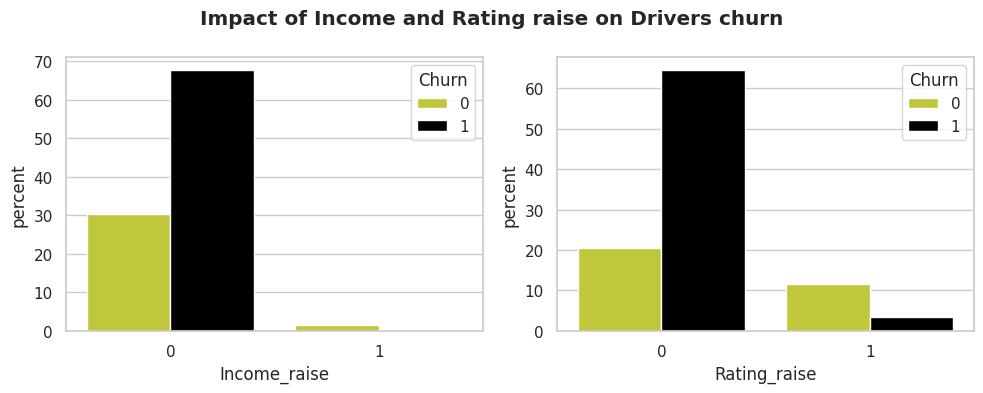

In [569]:
ola_palette = {0: "#D6DF22", 1: "#000000"}
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.countplot(data = df , x= 'Income_raise', hue = 'Churn', palette=ola_palette, stat='percent')

plt.subplot(1,2,2)
sns.countplot(data = df, x= 'Rating_raise' , hue = 'Churn' , palette = ola_palette, stat = 'percent')
plt.suptitle('Impact of Income and Rating raise on Drivers churn' , fontweight = 'bold')
plt.tight_layout()




**Observations**
- Drivers who received an **income raise** showed **no churn**, indicating that offering higher income benefits can be an effective strategy for retaining drivers.

- Drivers who received a **rating raise** also exhibited **significantly lower churn**, suggesting that non-monetary recognition, such as improved performance ratings, can contribute to driver retention.

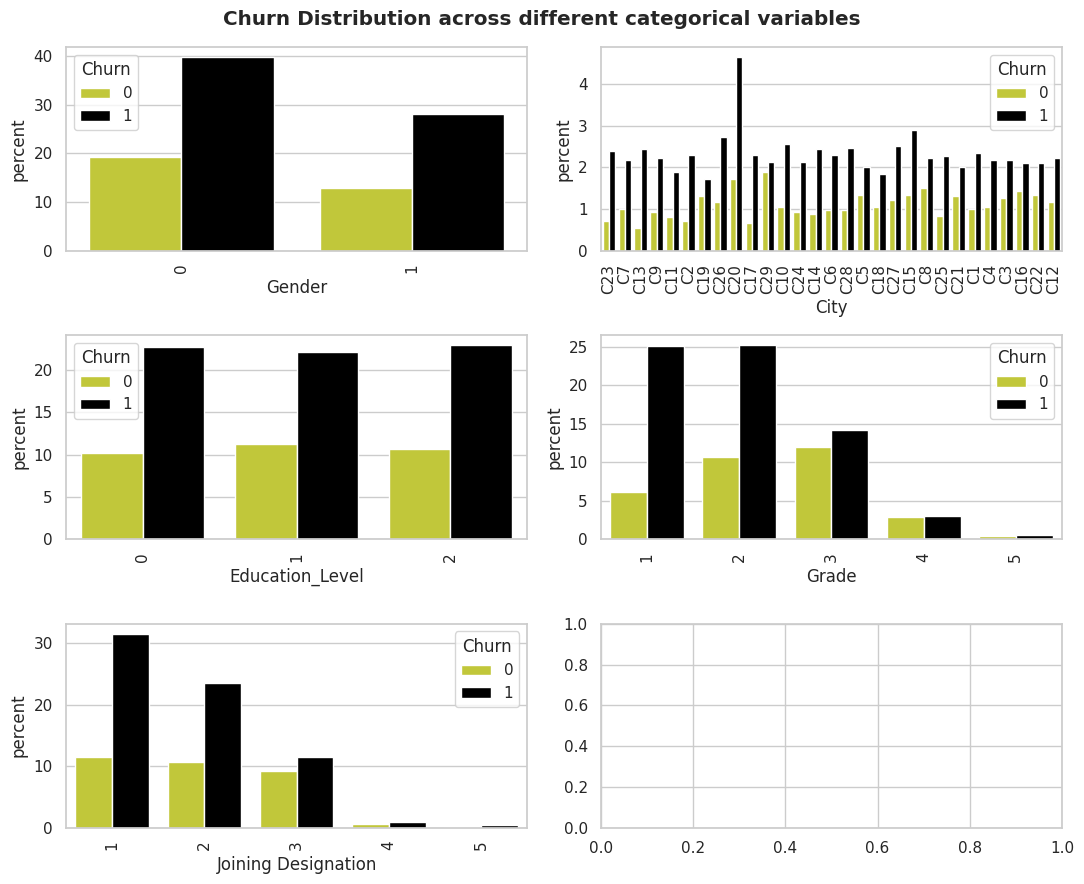

In [570]:
cols = ['Gender' , 'City' , 'Education_Level' , 'Grade' , 'Joining Designation']
fig,axes = plt.subplots(nrows = 3 , ncols =2 , figsize = (11,9))
axes = axes.flatten()
for index,col in enumerate(cols):
  sns.countplot(data =df, x= col ,hue = 'Churn' , ax= axes[index] , palette=ola_palette , stat = 'percent'  )
  axes[index].tick_params(axis='x', rotation=90)
plt.suptitle('Churn Distribution across different categorical variables', fontweight = 'bold')
plt.tight_layout()

**Observation**
- Columns like **`Gender`,`Education`** and **`city`** show no significant impact on drivers churn
-Drivers belonging to `Grade` 3 , 4 and 5 show churn rates close to 50 % showing a potential retention risk despite less overall head counts
- Drivers with **`Joining Designation`** 1, 2,3  shows highest churn headcount while 4 & 5 shows potential retention risk


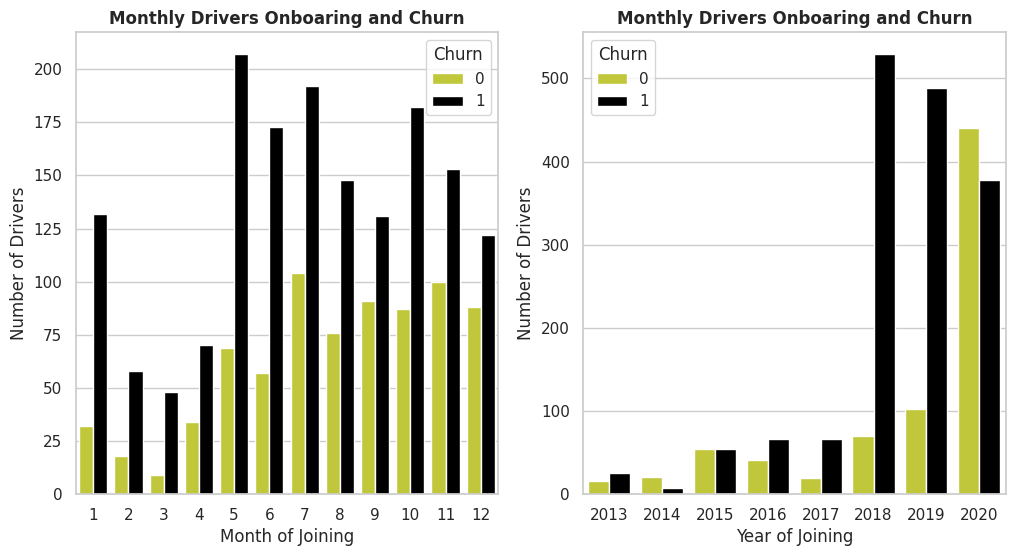

In [571]:
# df['Monthofjoining'] = df['Dateofjoining'].dt.month
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
sns.countplot(data = df , x= 'MonthofJoining' , hue = 'Churn' , palette = ola_palette)
plt.xlabel('Month of Joining')
plt.ylabel('Number of Drivers')
plt.title('Monthly Drivers Onboaring and Churn' , fontweight = 'bold')
plt.xticks(ticks=range(12), labels=range(1,13))

plt.subplot(1,2,2)
sns.countplot(data = df , x= 'YearofJoining' , hue = 'Churn' , palette = ola_palette)
plt.xlabel('Year of Joining')
plt.ylabel('Number of Drivers')
plt.title('Monthly Drivers Onboaring and Churn' , fontweight = 'bold')
# plt.xticks(ticks=range(12), labels=range(1,13))
plt.show()
plt.show()

**Observations**
- Drivers who have joined in 2018 and 2019 have Highest churn
- Drivers joined in 2020 have highest retention rate

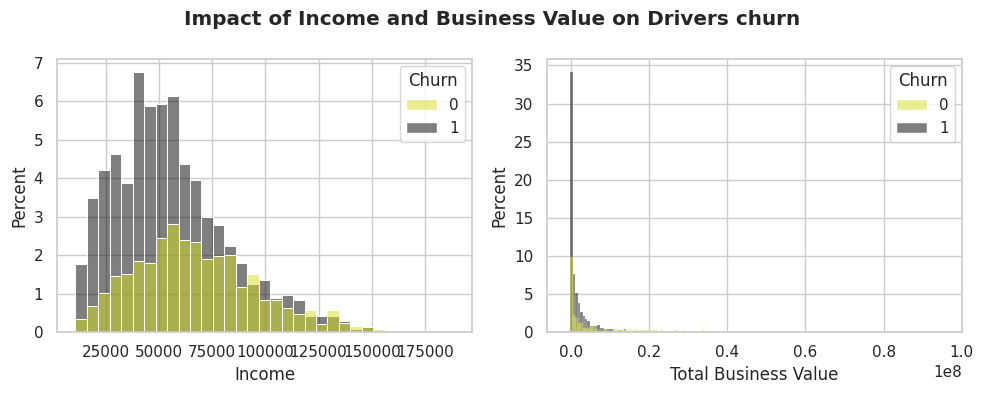

In [572]:
ola_palette = {0: "#D6DF22", 1: "#000000"}
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.histplot(data = df , x= 'Income', hue = 'Churn', palette=ola_palette, stat='percent')

plt.subplot(1,2,2)
sns.histplot(data = df, x= 'Total Business Value' , hue = 'Churn' , palette = ola_palette, stat = 'percent')
plt.suptitle('Impact of Income and Business Value on Drivers churn' , fontweight = 'bold')
plt.tight_layout()

 **Income vs Churn:**

-  Churn (gray) is more common among drivers with lower to mid-level incomes (25K–75K).

- Drivers **with higher income (>1 lakh) show less churn**, suggesting income stability reduces churn.

**Business Value vs Churn:**

- Most drivers (both churned and retained) generate very low total business value.

- A small fraction of high-value drivers exists, and they show much lower churn rates.

`In short: Low income and low business value drivers are more likely to churn, while higher earners and high-value drivers tend to stay.`








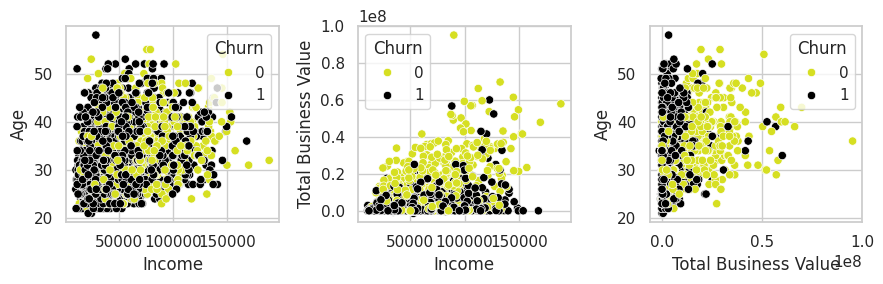

In [573]:
fig , axes = plt.subplots(nrows=1 , ncols = 3 , figsize = (9,3))
axes  = axes.flatten()
sns.scatterplot(data = df  , x = 'Income' , y= 'Age' , hue = 'Churn' , ax=axes[0] ,palette=ola_palette)
sns.scatterplot(data = df , x='Income' , y ='Total Business Value' , hue = 'Churn', ax = axes[1], palette=ola_palette)
sns.scatterplot(data = df  , x = 'Total Business Value' , y= 'Age' , hue = 'Churn' , ax=axes[2] ,palette=ola_palette)
plt.tight_layout()

**Observation**
- Older, more experienced drivers earn higher income, showing a positive relationship between age (experience) and earnings.

- Drivers with higher total business value are less likely to churn, indicating strong engagement and retention among top performers.


<Axes: >

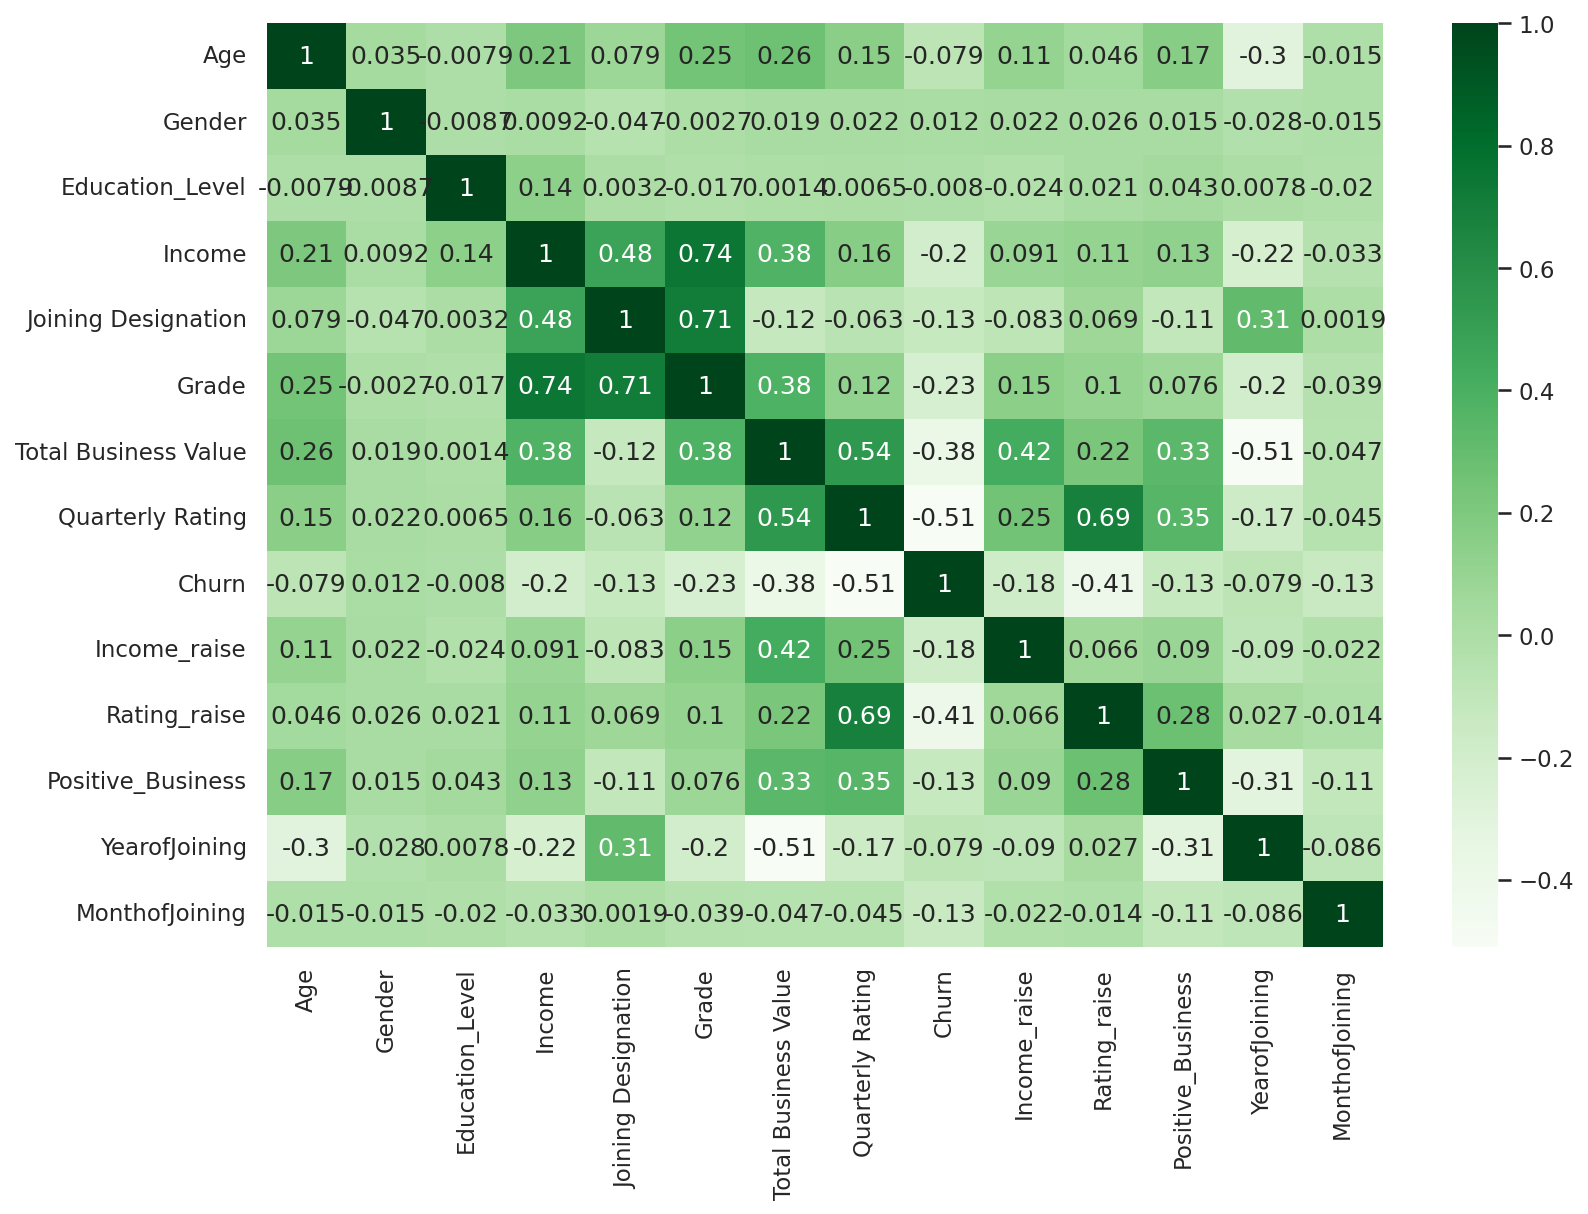

In [574]:
plt.figure(figsize = (12,8), dpi =150)
num_corr = df.select_dtypes(include = [int , float]).corr()
sns.heatmap(num_corr , annot = True , cmap = 'Greens')

**Observations**

 - **Grade, Income, and Total Business Value** show a moderate negative correlation with churn, indicating that higher pay, better grades, and stronger business performance are linked to lower churn probability.

- **Churn and Quarterly Rating** have a strong negative correlation, meaning drivers with poor ratings and no raises are more likely to churn.

- **Year of Joining and Quarterly Rating** show a negative correlation, suggesting that recent drivers tend to have lower ratings — highlighting possible training or onboarding gaps.

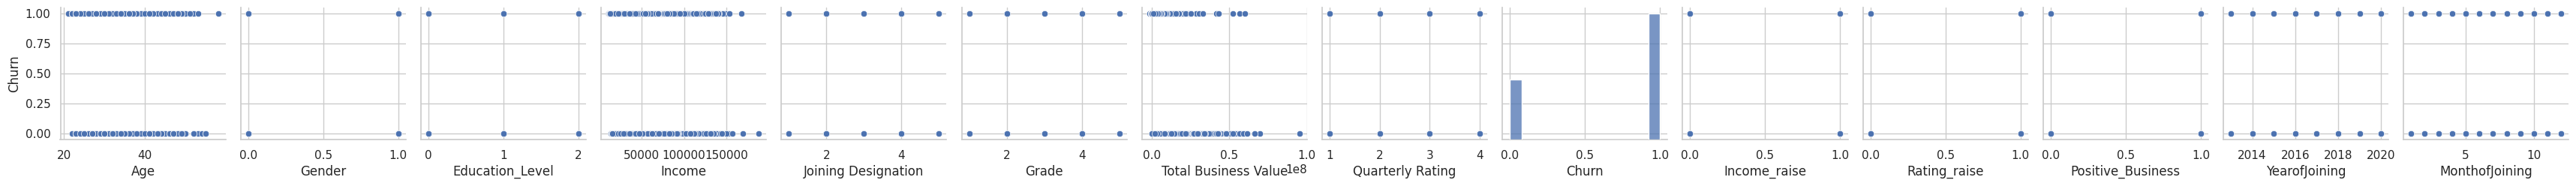

In [575]:
sns.pairplot(data = df , y_vars = 'Churn')

#Outlier Treatment

<Axes: xlabel='Total Business Value', ylabel='Count'>

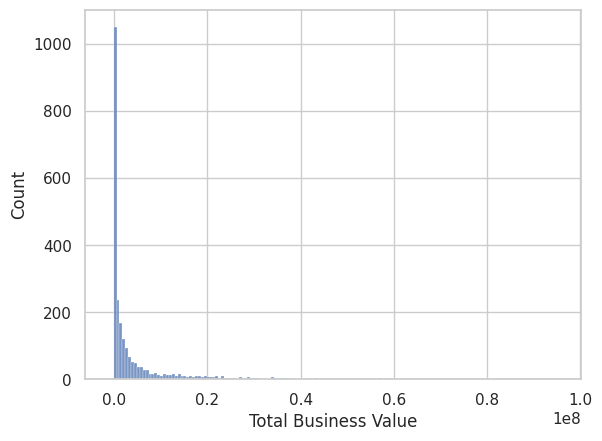

In [576]:
sns.histplot(df['Total Business Value'])

In [577]:
#IQR Method
q1 = np.percentile(df['Total Business Value'] , 0.25)
q3 = np.percentile(df['Total Business Value'] , 0.75)
iqr = q3 - q1
upper_bound = q3 +(1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

df_mod = df[(df['Total Business Value'] >= lower_bound) & (df['Total Business Value'] <=upper_bound)]

<Axes: xlabel='Total Business Value', ylabel='Count'>

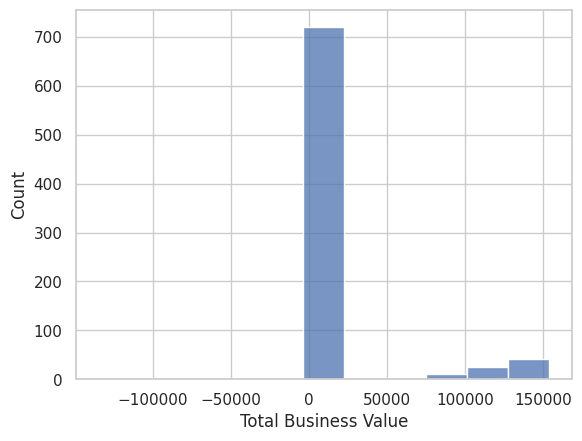

In [578]:
sns.histplot(df_mod['Total Business Value'])

<Axes: xlabel='Total Business Value', ylabel='Count'>

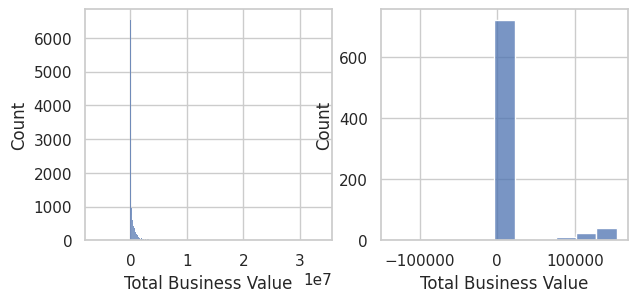

In [579]:
plt.figure(figsize = (7,3))
plt.subplot(1,2,1)
sns.histplot(df_original['Total Business Value'])

plt.subplot(1,2,2)
sns.histplot(df_mod['Total Business Value'])

In [580]:
df.columns

Index(['Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Churn', 'Income_raise', 'Rating_raise',
       'Age_group', 'Positive_Business', 'YearofJoining', 'MonthofJoining'],
      dtype='object')

In [581]:
df['Income_raise'].value_counts()

,count
Income_raise,
0,2338
1,43


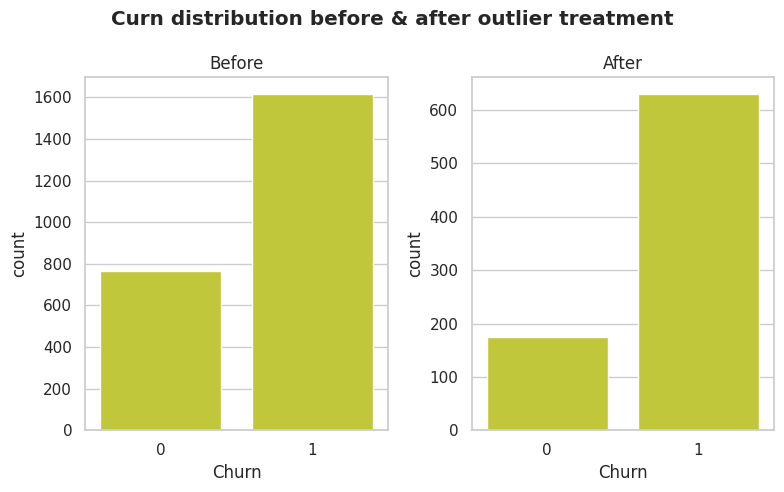

In [582]:
plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
sns.countplot(data =df , x= 'Churn' , color = '#D6DF22')
plt.title('Before')

plt.subplot(1,2,2)
sns.countplot(data = df_mod , x= 'Churn', color = '#D6DF22')
plt.title('After')

plt.suptitle('Curn distribution before & after outlier treatment' , fontweight = 'bold')
plt.tight_layout()
plt.show()

**Observation on Outlier Removal**

**High Data Loss:**
- Removing statistical outliers resulted in a substantial drop in total records, reducing the sample size enough to affect model reliability.

**Key Feature Impact:**
- After outlier removal, certain important columns— `Rating_Raise` and `Income_Raise`—showed no remaining churned employees, eliminating the variation needed to analyze their relationship with churn.



###**Final Take on Outliers**
Outlier removal was tested and found to negatively affect both the exploratory analysis and model performance. Therefore, o**utliers will be retained** in the dataset to preserve data integrity and ensure the model captures the full range of real-world variation.

#Data Pre - Processing

In [583]:
df= pd.get_dummies(df, columns = ['Age_group'], dtype = 'int')

In [584]:
df['City'] = df['City'].str.replace('C' , '').str.replace(' ' , '')
df['City'] = df['City'].astype(int)

In [585]:
X = df.drop('Churn' ,axis = 1)
y= df['Churn']

In [586]:
from sklearn.model_selection import train_test_split



X_train , X_remaining , y_train , y_remaining = train_test_split(X, y ,test_size= 0.6 , random_state=42)
X_val, X_test , y_val, y_test = train_test_split(X_remaining , y_remaining , test_size = 0.2 , random_state =42)

In [587]:
X_train.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Income_raise,Rating_raise,Positive_Business,YearofJoining,MonthofJoining,Age_group_Middle - aged,Age_group_Young,Age_group_senior
842,31,0,23,1,61823,2,2,16187110,3,0,0,1,2020,1,1,0,0
1373,42,0,27,1,20797,2,2,0,1,0,0,0,2018,7,1,0,0
1963,35,0,1,1,103102,2,2,2938190,1,0,0,1,2019,9,1,0,0
1598,38,0,15,1,18948,1,1,638080,1,0,0,1,2018,5,1,0,0
276,44,1,11,1,133752,1,3,14717150,2,0,0,1,2015,7,1,0,0


In [588]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_sm , y_sm = sm.fit_resample(X_train, y_train)

In [589]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [590]:
from sklearn.metrics import classification_report
print(classification_report(y_val,dt.predict(X_val)))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       365
           1       0.90      0.89      0.89       778

    accuracy                           0.86      1143
   macro avg       0.83      0.84      0.84      1143
weighted avg       0.86      0.86      0.86      1143



#Model Building

##Bagging

In [591]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_sm,y_sm)


print(f'Train accuracy -->{rfc.score(X_sm , y_sm)}')
print(f'Test accuracy -->{rfc.score(X_val , y_val)}')

Train accuracy -->1.0
Test accuracy -->0.8862642169728784


In [592]:
from sklearn.metrics import classification_report
print(classification_report(y_val,rfc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       365
           1       0.94      0.89      0.91       778

    accuracy                           0.89      1143
   macro avg       0.86      0.88      0.87      1143
weighted avg       0.89      0.89      0.89      1143



##Hyperparameter Tuning

In [593]:
params = {'n_estimators' : [100 , 200 , 300 , 400],
 'max_depth' : [3,5,10,15],
 'criterion' : [ 'gini' , 'entropy' , 'log_loss'],
  'max_features' : [8 , 10 , 12 ],
  'bootstrap' : [True, False]
  }

In [594]:
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator = RandomForestClassifier(),
                    param_distributions = params,
                    scoring = 'accuracy' ,
                    n_iter = 15 ,
                    n_jobs = -1,
                    cv =3)

In [595]:
random_cv.fit(X_sm , y_sm)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 5, 10, 15],
                                        'max_features': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='accuracy')

In [596]:
print("Best params: ", random_cv.best_params_)
print("Best score: ", random_cv.best_score_)

Best params:  {'n_estimators': 200, 'max_features': 8, 'max_depth': 15, 'criterion': 'gini', 'bootstrap': False}
Best score:  0.9121956348188065


In [597]:
rfc_2 = RandomForestClassifier(n_estimators= 300 ,
                               max_features = 8 ,
                               max_depth=15 ,
                               criterion='entropy' ,
                               bootstrap = True)
rfc_2.fit(X_sm , y_sm)


print(f'Train accuracy -->{rfc_2.score(X_sm , y_sm)}')
print(f'Test accuracy -->{rfc_2.score(X_test , y_test)}')

Train accuracy -->1.0
Test accuracy -->0.916083916083916


In [598]:
print(classification_report(y_val , rfc_2.predict(X_val)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       365
           1       0.95      0.89      0.92       778

    accuracy                           0.89      1143
   macro avg       0.87      0.89      0.88      1143
weighted avg       0.90      0.89      0.89      1143



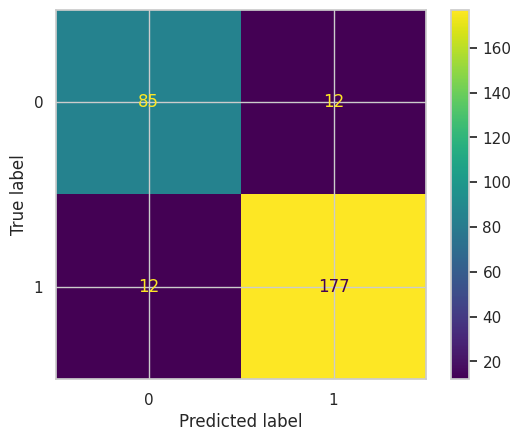

In [599]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(y_test ,rfc_2.predict(X_test) )
ConfusionMatrixDisplay(cm , display_labels=[0, 1]).plot()

<Axes: >

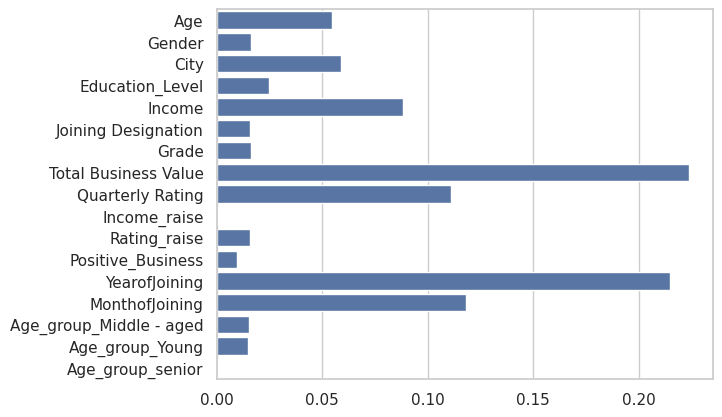

In [600]:
feature_importances = rfc_2.feature_importances_
features = np.array(X_sm.columns)
most_imp_features = features[np.argsort(feature_importances)]
sns.barplot(y = features , x= feature_importances)

##Boosting

In [601]:
%pip install catboost

In [602]:
import lightgbm as lgb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

xgb = XGBClassifier()
xgb.fit(X_sm, y_sm)
print(f'XG Boost - Train accuracy -->{f1_score(y_sm, xgb.predict(X_sm))}')
print(f'XGBoost Test accuracy -->{f1_score(y_val, xgb.predict(X_val))}')
print('---------' * 10)

lgb_clf = lgb.LGBMClassifier(verbose=-1)
lgb_clf.fit(X_sm , y_sm)
print(f'Light GBM - Train accuracy -->{lgb_clf.score(X_sm , y_sm)}')
print(f'Light GBM - Test accuracy -->{lgb_clf.score(X_val , y_val)}')


print('---------' * 10)

cb= CatBoostClassifier(verbose=0)
cb.fit(X_sm , y_sm)
print(f'Cat boost - Train accuracy -->{cb.score(X_sm , y_sm)}')
print(f'Cat boost - Test accuracy -->{cb.score(X_val , y_val)}')


XG Boost - Train accuracy -->1.0
XGBoost Test accuracy -->0.917098445595855
------------------------------------------------------------------------------------------
Light GBM - Train accuracy -->1.0
Light GBM - Test accuracy -->0.8836395450568679
------------------------------------------------------------------------------------------
Cat boost - Train accuracy -->0.9861325115562404
Cat boost - Test accuracy -->0.89501312335958


##Hyperparameter Tuning (Boosting)

In [603]:
params = {'n_estimators' : [100 , 200 , 300 , 400],
 'max_depth' : [3,5,10,15],
 'learning_rate' : [0.01 , 0.1 ,0.3],
  'gamma' : [0 , 2, 3]
  }

In [604]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator= xgb
                                   ,
                                   param_distributions= params,
                                   scoring = 'f1',
                                   cv = 3,
                                   verbose=2,
                                   n_jobs= -1)
random_search.fit(X_sm , y_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [0, 2, 3],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='f1', verbose=2)

In [605]:
print("Best params: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best params:  {'n_estimators': 400, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0}
Best score:  0.9127716356889918


In [606]:
xgb = XGBClassifier(n_estimators = 200,
                    max_depth = 5,
                    learning_rate = 0.1 ,
                    gamma = 0)
xgb.fit(X_sm,y_sm)
print(f'XG Boost - Train accuracy -->{f1_score(y_sm, xgb.predict(X_sm))}')
print(f'XGBoost Test accuracy -->{f1_score(y_val, xgb.predict(X_val))}')

XG Boost - Train accuracy -->1.0
XGBoost Test accuracy -->0.9154746423927178


#Final check on test data

In [607]:
y_pred = xgb.predict(X_test)
print(f'XGBoost Test Accuary --> { f1_score(y_test, y_pred)}')


XGBoost Test Accuary --> 0.9295039164490861


<Axes: >

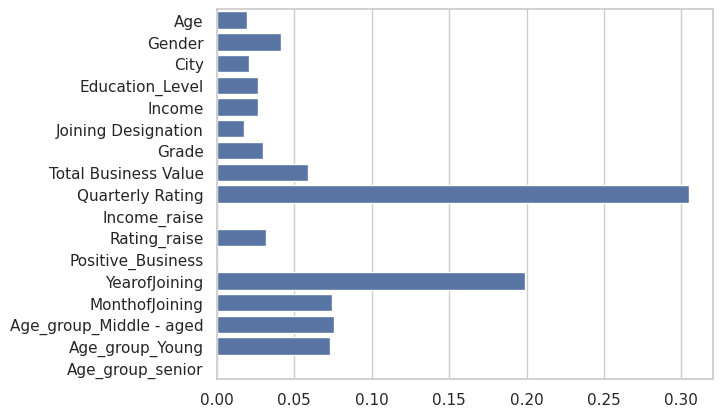

In [608]:
feature_importances = xgb.feature_importances_
features = np.array(X_sm.columns)
sns.barplot(y = features , x= feature_importances)

**Observation**

| Model             | Train Accuracy | Test Accuracy | Key Observation                                                               |
| ----------------- | -------------: | ------------: | ----------------------------------------------------------------------------- |
| **Random Forest**(With Hyper parameter tuning) |       **1.00** |     **0.916** | Strong performance, but perfect training score suggests possible overfitting. |
| **XGBoost**(With Hyper parameter tuning)       |       **1.00** |     **0.93** | Highest test accuracy; also shows signs of overfitting.                       |
| **LightGBM**      |       **1.00** |     **0.890** | Good accuracy but lower than RF/XGB; potential overfitting.                   |
| **CatBoost**      |      **0.986** |     **0.899** | Slightly lower train accuracy → better generalization balance.                |


#Evluation

##Classification report

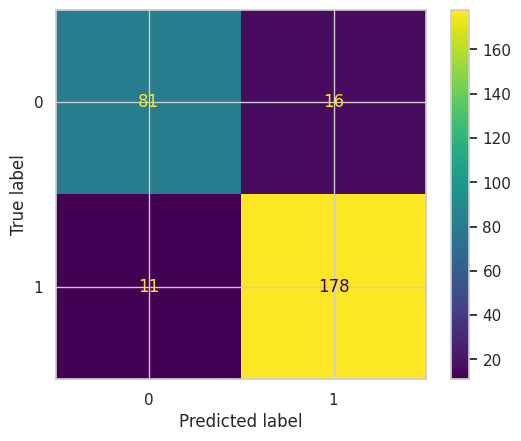

In [609]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(y_test ,xgb.predict(X_test) )
ConfusionMatrixDisplay(cm , display_labels=[0, 1]).plot()

**Observations**
- The model shows balanced and strong performance with both **high recall** and **high precision** for churn prediction.
- The small numbers of false positives (12) and false negatives (11) indicate **minimal misclassification**, making this model suitable for proactive driver-retention strategies.

##ROC AUC Curve


AUC Score: 0.9425573123921542


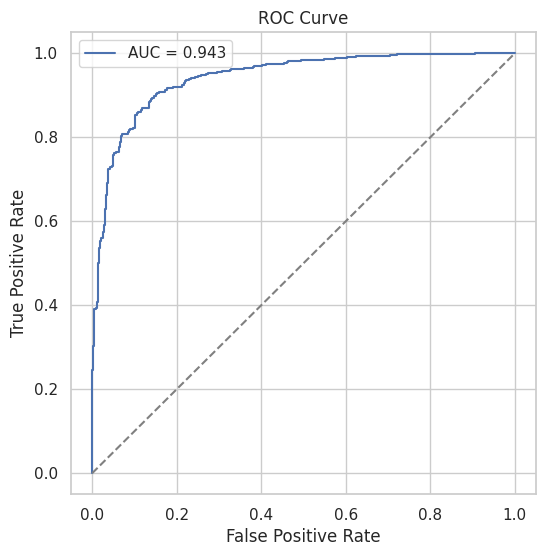

In [610]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb.predict_proba(X_val)[: ,1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
auc_score = roc_auc_score(y_val, y_pred_proba)
print("AUC Score:", auc_score)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="grey")  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Observations**
-  The model’s **AUC = 0.945**, which indicates excellent ability to distinguish between positive and negative classes.

#Insights & Recommendations

##Insights


- **Churn Status**

    - 1,600 drivers churned vs. 800 retained → overall churn rate of ≈66.7%, highlighting a significant class imbalance.

- **Gender Distribution**

    - The driver base is predominantly male, indicating a strong gender imbalance.

- **Date of Joining**

    - A majority of drivers joined between 2018 and 2020, reflecting a period of rapid platform expansion.

- ***Income Raise***

    - No churn observed among drivers who received an income raise, suggesting that higher earnings are an effective retention lever.

- **Joining Designation**

    - Designations 1–3 show the highest churn, while Designations 4–5 present a potential retention risk, though lower than 1–3.

- **Overall Patterns**

    - Low income and low business value drivers are far more likely to churn.

    - Grade, Income, and Total Business Value exhibit a moderate negative correlation with churn, meaning higher pay, stronger performance, and better grades reduce churn probability.


##Recommendations

1️⃣ Targeted Retention Incentives

- Income Raises or Performance Bonuses:
My analysis shows zero churn among drivers who received raises.
- → **Recommendation**: Implement structured incentive programs (e.g., quarterly bonuses, mileage-based raises) for high-performing or at-risk drivers.

2️⃣ Focused Support for High-Risk Segments

- Joining Designations 1–3:
These groups have the highest churn.
- **→ Recommendation**: Provide extra engagement—personalized coaching, early access to incentives, or career-path opportunities—to these designations.

3️⃣ Early Tenure Engagement

- Many drivers joined during 2018–2020. Drivers from these cohorts may now be reaching critical churn points.
- **→ Recommendation**: Offer anniversary rewards or loyalty bonuses at 3-, 4-, and 5-year milestones to reinforce retention.

4️⃣ Income & Business Value Uplift

- Low-income/low-business-value drivers churn more.
- **→ Recommendation**:
Introduce minimum guaranteed earnings or targeted ride-bonus campaigns to help underperforming drivers increase their business value.

5️⃣ Gender Balance Initiatives

- The driver base is male-dominated.
- **→ Recommendation**:

    - Launch female driver recruitment and support programs (e.g., safety measures, flexible hours, childcare subsidies).

    - Promote existing female drivers as role models to attract more women.

6️⃣ Continuous Performance Monitoring

- Use the negative correlation of Grade, Income, and Total Business Value with churn to build a predictive churn model.
- **→ Recommendation**:

    - Identify drivers whose grades or earnings drop below thresholds.

    - Trigger proactive outreach (coaching, incentives) before they decide to leave.

7️⃣ Communication & Feedback

- Implement regular driver satisfaction surveys and real-time feedback loops.

- Helps spot pain points—policy changes, incentive issues—early and reduce unexpected churn.

#Questionare

##What percentage of drivers have received a quarterly rating of 5?

No Driver recieved a quarterly rating of 5


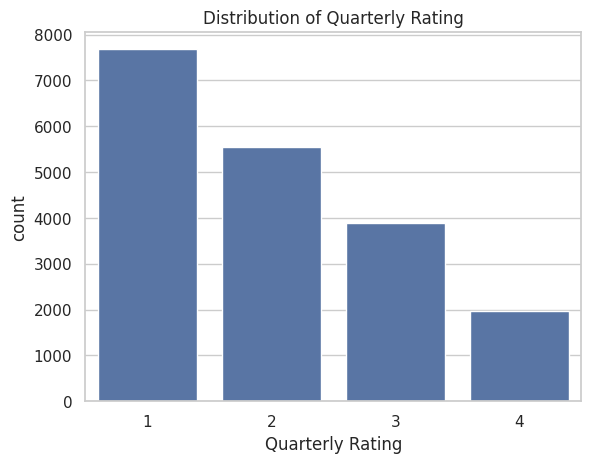

In [611]:
#What percentage of drivers have received a quarterly rating of 5?


if df_original[df_original['Quarterly Rating'] == 5].shape[0] > 1:
  print(f'No of of Drivers who recieve Quarterly rating greater than 4 are {df_original[df_original['Quarterly Rating'] == 5].shape[0]}')
else:
  print('No Driver recieved a quarterly rating of 5')

sns.countplot(data = df_original ,  x= 'Quarterly Rating')
plt.title('Distribution of Quarterly Rating')
plt.show()

##Comment on the correlation between Age and Quarterly Rating.

In [612]:
df_original['Age'].corr(df_original['Quarterly Rating'] , method = 'pearson')

np.float64(0.17181837533931058)

The correlation between age and Quarterly rating sis  0.17181837533931058


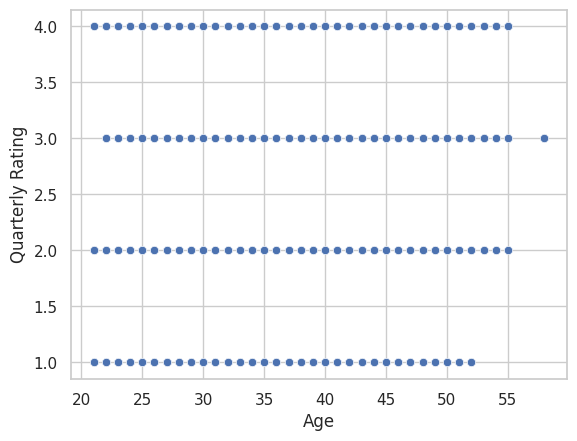

In [613]:
print('The correlation between age and Quarterly rating sis ',df_original['Age'].corr(df_original['Quarterly Rating'] , method = 'pearson'))
sns.scatterplot(data = df_original , x= 'Age' , y = 'Quarterly Rating')
plt.show()


The Pearson correlation between Age and Quarterly Rating is about 0.17, which indicates a negligible positive relationship. In practical terms, Age has almost no effect on Quarterly Rating

##Which city showed the most improvement in Quarterly Rating over the past year

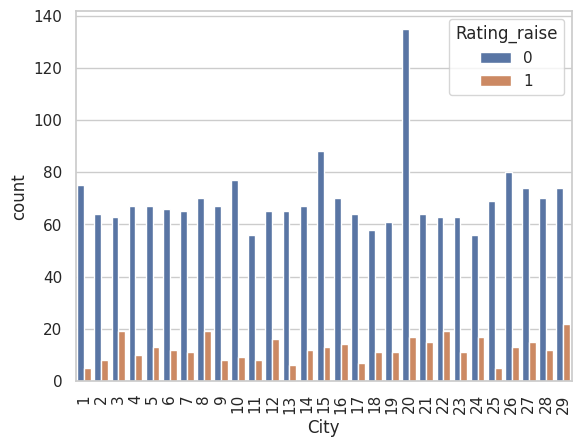

In [614]:
sns.countplot(data = df,  x= 'City' , hue = 'Rating_raise')
plt.xticks( rotation = 90)
plt.show()

Cities like C29 , C3 snd C22 showed most improvement in Quarterly Rating over the past year

## Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value.(T/F)

In [615]:
df.groupby('Grade')['Total Business Value'].mean()


,Total Business Value
Grade,
1,2.188876e+06
2,3.290683e+06
3,4.889091e+06
4,2.082520e+07
5,2.357335e+07


False - Drivers with Grade 'A' or 1 are not the one with highest Business value

## If a driver's Quarterly Rating drops significantly, how does it impact their Total **Business** Value in the subsequent period?

<Axes: xlabel='Rating_raise', ylabel='Total Business Value'>

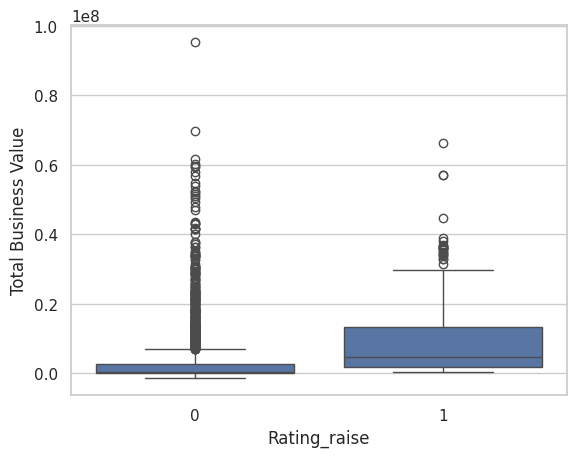

In [616]:
df.groupby('Rating_raise')['Total Business Value'].mean()
sns.boxplot(x='Rating_raise', y='Total Business Value', data=df)

Drivers with rating improvements show significantly higher Total Business Value.
This suggests that better ratings lead Ola to allocate more rides and incentives, directly boosting drivers’ business performance.

##From Ola's perspective, which metric should be the primary focus for driver retention?
1. ROC AUC
2. Precision
3. Recall
4. F1 Score

**Ans :** From Ola’s perspective, Recall should be the primary focus for driver retention.
Because it’s better to flag more drivers at risk (and then try retention strategies) than to miss those who are actually leaving.

##How does the gap in precision and recall affect Ola's relationship with its drivers and customers?

**If Recall is much higher than Precision**

Ola can identify most drivers likely to leave and roll out retention strategies in time.

However, many stable drivers may get unnecessary retention calls or offers, creating annoyance and extra administrative work.

These added incentives and outreach efforts increase operational costs, which could eventually affect customer pricing.

Net effect: more drivers are retained overall, so riders experience better availability and service quality.

**If Precision is higher than Recall**

The model is very confident when it predicts churn, but it misses many true churners.

As a result, some at-risk drivers receive no support and leave quietly.

Remaining drivers may face heavier workloads and longer hours, leading to stress or burnout.

Customers may encounter longer wait times, higher fares, and reduced service reliability, which can harm Ola’s brand reputation.

**Summary:**

**High Recall > High Precision**: better for retaining drivers but costlier and potentially intrusive.

**High Precision > High Recall**: cheaper and less intrusive, but risks losing many drivers and harming customer experience.

**Balanced F1 approach**: Ola should aim for high recall with acceptable precision, so they catch most churners while controlling unnecessary outreach and costs.

##Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?

1️⃣ **Acceptance & Cancellation Patterns**

  **Acceptance rate**: willingness to accept ride requests promptly.

  **Cancellation rate**: frequent last-minute cancellations can frustrate riders and lower ratings.

2️⃣ **On-Time Behavior**

**Pickup punctuality**: average delay in reaching passengers.

**Trip start punctuality**: time taken to begin once the rider boards.

3️⃣ **Service Quality Signals**

Ride comfort feedback (cleanliness, music/temperature control, politeness).

**In-ride communicatio**n: clarity and courtesy in calls/texts.

4️⃣ **Safety-Related Metrics**

Hard-braking or speeding events captured by telematics.

Adherence to traffic laws (e.g., fewer fines/violations).

5️⃣ **Customer Interaction Data**

Compliments vs. complaints ratio from riders.

Response time to support issues when disputes arise.

6️⃣ **Shift & Route Characteristics**

Peak-hour driving: handling heavy traffic or late-night rides.

Route diversity: ability to service both high- and low-demand areas.

7️⃣ **Platform Engagement**

App update compliance (staying current with the driver app).

Participation in training or feedback sessions offered by Ola.

8️⃣ **Vehicle Condition & Type**

Age and maintenance records of the car or bike.

Amenities like AC functionality or cleanliness scores.

##Will the driver's performance be affected by the City they operate in? (Yes/No)

Yes – the city a driver operates in can influence performance.

Different cities vary in:

- Traffic congestion & road conditions → affects punctuality and ride completion times.

- Demand patterns & peak hours → impact number of rides and earnings.

- Local customer expectations → influence ratings and feedback.

- Regulations & competition → can affect incentives and stress levels.